In [161]:
import os
import sys
import numpy as np
# import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
# import cmocean
import xarray as xr
import seaborn as sns

def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [2]:
# Determine where to look #
basedir = 'data'
# basedir = '/Users/dporter/Documents/Research/Projects/bedclass/data'



Cols 1 and 2 are the PS71 x and y centroid
of the lake outline. Cols 3, 4, and 5 are different potential lake “lengths” to
use. Cols 3 and 4 are the width and length of the minimum area Feret diameter
rectangles (where width is always the short side, length is always the long
side). Col. 5 is the diameter of an area-equivalent circle (i.e., if the lake
had the same area, but was a circle). Column 6 is the ice thickness from
BedMachine.

In [3]:
datadir = 'Stubblefield_etal_2021'
# suffix = '.out'
# atm_suffix = '.dat'
infile = os.path.join(basedir, datadir, 'active_lake_statistics.dat')
df = pd.read_csv(infile, header=None)
df

,0,1,2,3,4,5
0,-7.872365e+05,-6.964783e+05,14.929155,15.809570,15.729241,2034.226346
1,-8.369120e+05,-7.071226e+05,10.616984,12.348608,11.684302,2342.652641
2,-8.717371e+05,-6.483884e+05,10.359836,16.153130,13.372880,2157.231601
3,-8.216156e+05,-5.871411e+05,14.058428,22.898664,18.936645,2283.606973
4,-8.476007e+05,-5.717129e+05,16.939960,27.915083,22.352065,2262.888377
...,...,...,...,...,...,...
126,-4.569299e+05,-4.889175e+05,8.355317,10.104870,9.744962,1418.605343
127,-5.379161e+05,-5.018446e+05,8.388054,11.235704,9.899281,1020.660557
128,-6.474977e+05,-2.829098e+05,12.874932,14.791985,14.387230,2505.805259
129,2.229282e+06,-6.695342e+05,26.747072,28.594269,27.363538,3047.392511


In [8]:
infile = os.path.join(basedir, datadir, 'H_beta.zarr')
df = xr.open_dataset(infile)# , consolidated=False)
df

/var/folders/4b/tlrtp4_x48bdc8tdw206wqzr0000gn/T/ipykernel_93981/2877874868.py:2: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  df = xr.open_dataset(infile)# , consolidated=False)


<xarray.Dataset>
Dimensions:    (y: 1120, x: 1160)
Coordinates:
  * x          (x) float64 -2.798e+06 -2.792e+06 ... 2.992e+06 2.998e+06
  * y          (y) float64 -2.798e+06 -2.792e+06 ... 2.792e+06 2.798e+06
Data variables:
    beta       (y, x) float64 ...
    thickness  (y, x) float64 ...

In [13]:
df.median()

<xarray.Dataset>
Dimensions:    ()
Data variables:
    beta       float64 3.154e+03
    thickness  float64 -16.5

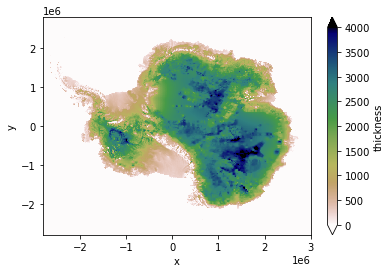

In [57]:
ax = plt.subplot()
p1 = df['thickness'].plot(robust=True,
                cmap='gist_earth_r',
                vmin=0, vmax=4000,
                extend="both",
                )


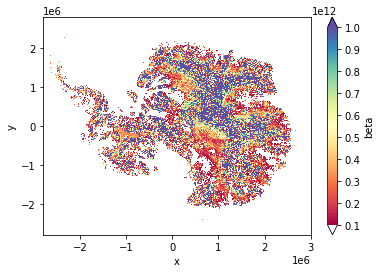

In [50]:
my_cmap = plt.cm.get_cmap('Spectral').copy()

ax = plt.subplot()
p1 = df['beta'].plot(robust=True,
                cmap=my_cmap,
                vmin=0.1e12, vmax=1e12,
                extend="both",
                )

p1.cmap.set_under('white')

# plt.colorbar(p1)

In [96]:
print(f"X resolution is {df.x.diff(dim='x').mean().values} km")
print(f"Y resolution is {df.y.diff(dim='y').mean().values} km")

X resolution is 5000.0 km
Y resolution is 5000.0 km


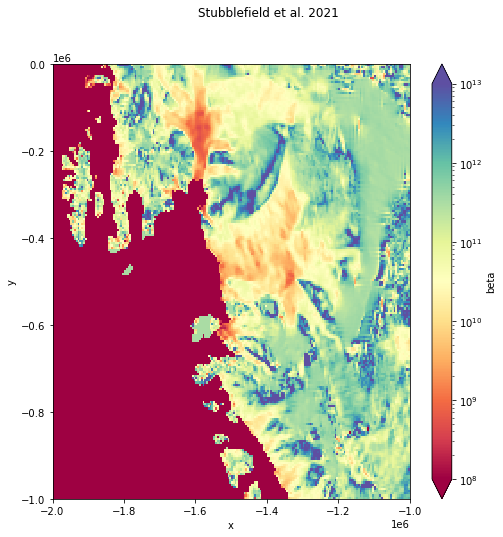

In [140]:
fig = plt.figure(figsize=(8, 8))

df['beta'].sel(x=slice(-2e6,-1e6), y=slice(-1e6,0e6)).plot(
    # aspect=2, size=8,
    robust=True, 
    cmap="Spectral",
    # norm=colors.LogNorm(vmin=df['beta'].min(), vmax=df['beta'].max()),
    norm=colors.LogNorm(vmin=1e8, vmax=1e13),
    )

plt.suptitle('Stubblefield et al. 2021')
plt.savefig('figs/Stubblefield2021.png')

In [156]:
import rioxarray

# datadir = 'Stubblefield_etal_2021'
# suffix = '.out'
# atm_suffix = '.dat'
infile = os.path.join(basedir, 'grav_upward_class_30_amund.tif')
# infile = os.path.join(basedir, 'mag_upward_class_200_amund.tif')



# df_gravclass = xr.open_dataset(infile, engine="rasterio")
df_gravclass = rioxarray.open_rasterio(infile)

df_gravclass

<xarray.DataArray (band: 3, y: 1482, x: 1437)>
[6388902 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 -2.268e+03 -2.267e+03 -2.266e+03 ... -833.0 -832.0
  * y            (y) float64 174.0 173.0 172.0 ... -1.306e+03 -1.307e+03
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

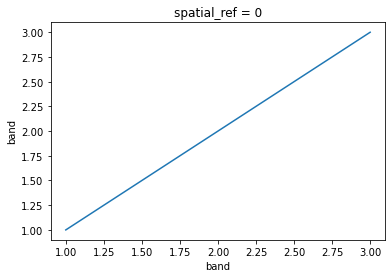

In [157]:
df_gravclass.band.plot()

In [162]:
print_raster(df_gravclass)

shape: (1482, 1437)
resolution: (1.0, -1.0)
bounds: (-2268.5, -1307.5, -831.5, 174.5)
sum: 967856498
CRS: PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-90],PARAMETER["central_meridian",0],PARAMETER["scale_factor",0.9728],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["kilometre",1000],AXIS["Easting",NORTH],AXIS["Northing",NORTH]]



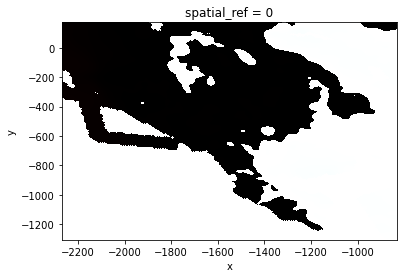

In [158]:
df_gravclass.astype("int").plot.imshow(rgb="band")